In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [45]:
df_hospital = pd.read_csv('Hospital_tratado.csv', encoding='utf-8', delimiter=';')

Quais são os municipios com maiores casos de internação hospitalar

In [46]:
contagem_municipio = df_hospital['Municipio'].value_counts()
municipio_frequencia = contagem_municipio.head(10)

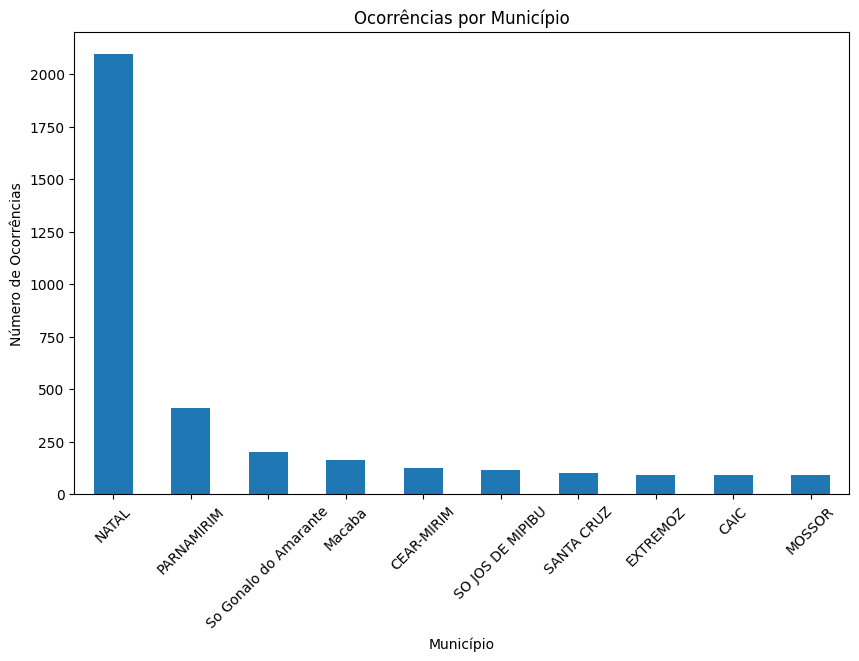

In [47]:
municipio_frequencia.plot(kind='bar', figsize=(10, 6), )
plt.title('Ocorrências por Município')
plt.xlabel('Município')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)  
plt.show()

Natal é a cidade com o maior numero de ocorrencias, vamos ver quais são os casos mais comuns de internações hospitalares.

In [48]:
natal_df = df_hospital[df_hospital['Municipio'] == 'NATAL']
contagem_por_especialidade = natal_df['Especialidade'].value_counts().head(5)


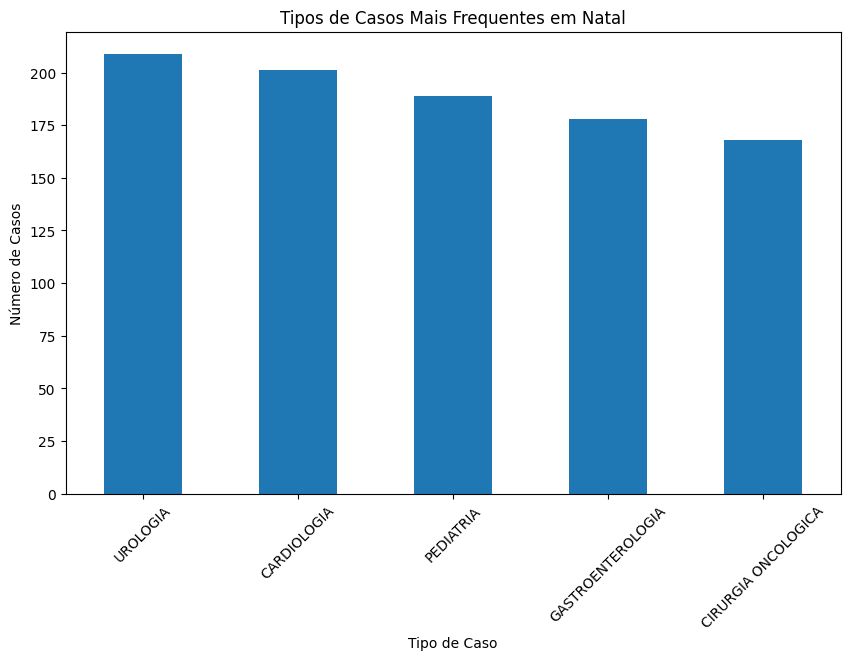

In [49]:
contagem_por_especialidade.plot(kind='bar', figsize=(10, 6))
plt.title('Tipos de Casos Mais Frequentes em Natal')
plt.xlabel('Tipo de Caso')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()

ver os dias/meses que mais aconteceram internções e quais foram os motivos mais comuns.

In [52]:
natal_df_data_atendimentos = natal_df[['data', 'hora']]
contagem_por_data_atendimento = natal_df_data_atendimentos.value_counts().head(5)

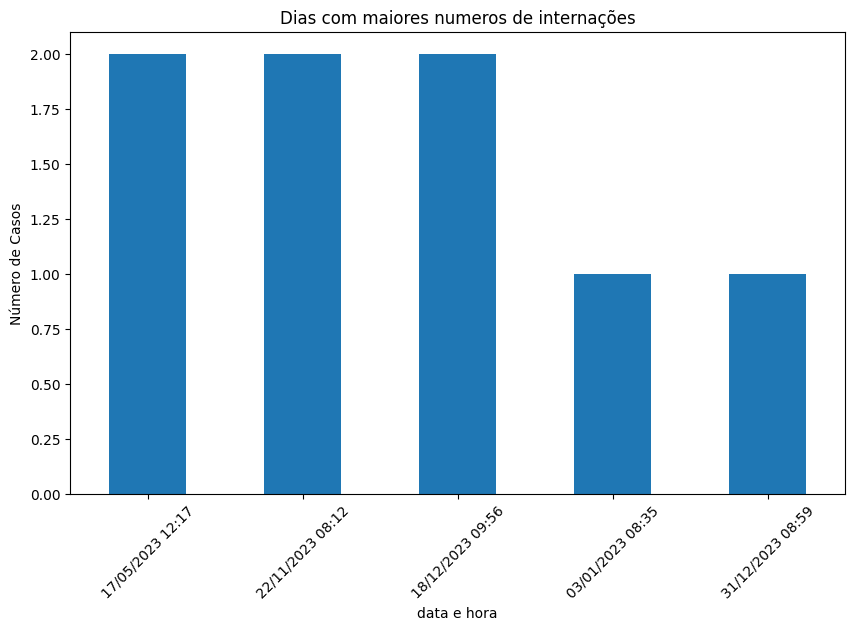

In [23]:
contagem_por_data_atendimento.plot(kind='bar', figsize=(10, 6))
plt.title('Dias com maiores numeros de internações')
plt.xlabel('data e hora')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()

In [57]:
atendimentos_por_data_especialidade = df_hospital.groupby(['data', 'Especialidade']).size().reset_index(name='contagem')

In [58]:
atendimentos_por_data_especialidade = atendimentos_por_data_especialidade.sort_values(by='contagem', ascending=False)

In [61]:
print("atendimentos por data e especialidade:")
print(atendimentos_por_data_especialidade.head(10))

atendimentos por data e especialidade:
            data      Especialidade  contagem
3012  2023-11-01           UROLOGIA        11
3014  2023-11-02           UROLOGIA        10
1474  2023-06-14  GASTROENTEROLOGIA         8
1529  2023-06-19    PRE-TRANSPLANTE         8
1117  2023-05-11        CARDIOLOGIA         8
2516  2023-09-18          PEDIATRIA         8
1622  2023-06-28  GASTROENTEROLOGIA         8
1681  2023-07-05          PEDIATRIA         8
2756  2023-10-10        CARDIOLOGIA         8
1757  2023-07-12  GASTROENTEROLOGIA         7


In [80]:
contagem_por_especialidade = atendimentos_por_data_especialidade.groupby('Especialidade').size()
especialidades_evolucao = contagem_por_especialidade.nlargest(5).index.tolist()
df_ = atendimentos_por_data_especialidade[atendimentos_por_data_especialidade['Especialidade'].isin(especialidades_evolucao)]



In [81]:
atendimentos_por_mes_especialidade = df_top_5.groupby([pd.Grouper(key='data', freq='M'), 'Especialidade']).mean().reset_index()


C:\Users\nockk\AppData\Local\Temp\ipykernel_14116\2267019795.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  atendimentos_por_mes_especialidade = df_top_5.groupby([pd.Grouper(key='data', freq='M'), 'Especialidade']).mean().reset_index()


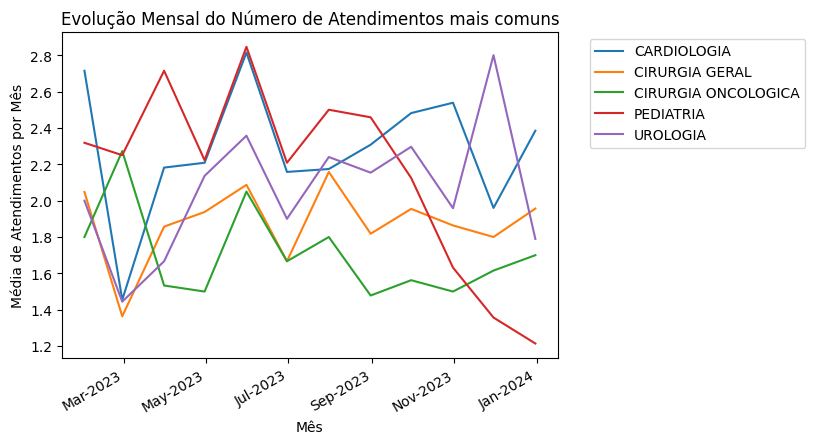

In [91]:
sns.lineplot(data=atendimentos_por_mes_especialidade, x='data', y='contagem', hue='Especialidade')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gcf().autofmt_xdate()
plt.title('Evolução Mensal do Número de Atendimentos mais comuns')
plt.xlabel('Mês')
plt.ylabel('Média de Atendimentos por Mês')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

Uma rapida pesquisa sobre as estações do ano no estado do rio grando norte nos mostra que julho é o mês mais frio, no mapa fica visivel que os maiores casos de internação são na pediatria, as crianças muitos vezes são mais suscetiveis a doenças respiratorias, o que pode ser um fator para o aumento de internações nesse periodo.